In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

In [ ]:
gen_data = pd.read_csv("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/sarcasm_headlines_synthetic__FULL__Llama_3_topp95_temp_7.csv")
gen_labels = gen_data.is_sarcastic.values

gen_embeddings = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/synt_bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs.npy")

data_train = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/train_Sarcasm_Headlines_Dataset.json", lines=True)
train_labels = data_train.is_sarcastic.values
bert_embeddings_train = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs_train.npy")

data_test = pd.read_json("/content/drive/MyDrive/Deeeep learning/Sarcasm Headlines/test_Sarcasm_Headlines_Dataset.json", lines=True)
test_labels = data_test.is_sarcastic.values
bert_embeddings_test = np.load("/content/drive/MyDrive/Deeeep learning/embeddings/bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs_test.npy")

In [ ]:
isarcasm_test = pd.read_csv('/content/drive/MyDrive/Deeeep learning/iSarcasm/isarcasm_test.csv')
isarcasm_test_labels = isarcasm_test.sarcastic.values
isarcasm_embeddings = np.load('/content/drive/MyDrive/Deeeep learning/embeddings/isarcasm_bert-BOTH-FULL-headlines-isarcasm-with-synt-50epochs.npy')

## Sklearn classifiers


In [ ]:
train_targets = np.concatenate((train_labels, gen_labels))
train_embeddings = np.concatenate((bert_embeddings_train, gen_embeddings))

In [ ]:
X_train = train_embeddings
y_train = train_targets
X_test = bert_embeddings_test
y_test = test_labels

In [ ]:
# Random forest
random_forest = RandomForestClassifier(max_depth=10, random_state=666, n_jobs=-1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=666)

In [ ]:
y_pred_rf = random_forest.predict(X_test)
print("Random Forest \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_rf))

Random Forest 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      2248
           1       0.75      0.57      0.65      2046

    accuracy                           0.71      4294
   macro avg       0.72      0.70      0.70      4294
weighted avg       0.71      0.71      0.70      4294



In [ ]:
y_pred_rf_is = random_forest.predict(isarcasm_embeddings)
print("iSarcasm \nRandom Forest \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_rf_is))

iSarcasm 
Random Forest 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.51      0.65      1200
           1       0.18      0.66      0.29       200

    accuracy                           0.53      1400
   macro avg       0.54      0.59      0.47      1400
weighted avg       0.80      0.53      0.60      1400



In [ ]:
# Ada Boost
ada_boost = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=666)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=666)

In [ ]:
y_pred_ada = ada_boost.predict(X_test)
print("Ada Boost \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_ada))

Ada Boost 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2248
           1       0.64      0.65      0.64      2046

    accuracy                           0.66      4294
   macro avg       0.66      0.66      0.66      4294
weighted avg       0.66      0.66      0.66      4294



In [ ]:
y_pred_ada_is = ada_boost.predict(isarcasm_embeddings)
print("iSarcasm \nAda Boost \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_ada_is))

iSarcasm 
Ada Boost 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.49      0.63      1200
           1       0.18      0.69      0.29       200

    accuracy                           0.52      1400
   macro avg       0.54      0.59      0.46      1400
weighted avg       0.80      0.52      0.59      1400



In [ ]:
# kNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred_knn = knn.predict(X_test)
print("kNN \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_knn))

kNN 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2248
           1       0.75      0.72      0.73      2046

    accuracy                           0.75      4294
   macro avg       0.75      0.75      0.75      4294
weighted avg       0.75      0.75      0.75      4294



In [ ]:
y_pred_knn_is = knn.predict(isarcasm_embeddings)
print("iSarcasm \nkNN \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_knn_is))

iSarcasm 
kNN 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.43      0.58      1200
           1       0.17      0.71      0.28       200

    accuracy                           0.47      1400
   macro avg       0.53      0.57      0.43      1400
weighted avg       0.79      0.47      0.53      1400



In [ ]:
# kNN cosine
knn_cos = KNeighborsClassifier(n_neighbors=20, metric='cosine')
knn_cos.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=20)

In [ ]:
y_pred_knn_cos = knn_cos.predict(X_test)
print("kNN cosine\nMetrics for prediction results:")
print(classification_report(y_test, y_pred_knn_cos))

kNN cosine
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2248
           1       0.78      0.69      0.73      2046

    accuracy                           0.76      4294
   macro avg       0.76      0.75      0.75      4294
weighted avg       0.76      0.76      0.76      4294



In [ ]:
y_pred_knn_cos_is = knn_cos.predict(isarcasm_embeddings)
print("iSarcasm \nkNN cosine \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_knn_cos_is))

iSarcasm 
kNN cosine 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56      1200
           1       0.16      0.66      0.25       200

    accuracy                           0.45      1400
   macro avg       0.52      0.54      0.41      1400
weighted avg       0.78      0.45      0.52      1400



In [ ]:
# Linear classifier
linear = SGDClassifier(max_iter=1000, tol=1e-3)
linear.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred_linear = linear.predict(X_test)
print("Linear classifier \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_linear))

Linear classifier 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2248
           1       0.78      0.75      0.77      2046

    accuracy                           0.78      4294
   macro avg       0.78      0.78      0.78      4294
weighted avg       0.78      0.78      0.78      4294



In [ ]:
y_pred_linear_is = linear.predict(isarcasm_embeddings)
print("iSarcasm \nLinear classifier \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_linear_is))

iSarcasm 
Linear classifier 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.49      0.64      1200
           1       0.18      0.67      0.28       200

    accuracy                           0.52      1400
   macro avg       0.54      0.58      0.46      1400
weighted avg       0.80      0.52      0.58      1400



In [ ]:
# sklearn MLP
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [ ]:
y_pred_mlp = mlp.predict(X_test)
print("MLP \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_mlp))

MLP 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2248
           1       0.79      0.81      0.80      2046

    accuracy                           0.81      4294
   macro avg       0.81      0.81      0.81      4294
weighted avg       0.81      0.81      0.81      4294



In [ ]:
y_pred_mlp_is = mlp.predict(isarcasm_embeddings)
print("iSarcasm \nMLP \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_mlp_is))

iSarcasm 
MLP 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1200
           1       0.20      0.56      0.30       200

    accuracy                           0.62      1400
   macro avg       0.55      0.60      0.52      1400
weighted avg       0.80      0.62      0.67      1400



In [ ]:
# SVM exponential kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf').fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)
print("SVM \nMetrics for prediction results:")
print(classification_report(y_test, y_pred_svm))

SVM 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2248
           1       0.83      0.81      0.82      2046

    accuracy                           0.83      4294
   macro avg       0.83      0.83      0.83      4294
weighted avg       0.83      0.83      0.83      4294



In [ ]:
y_pred_svm_is = svm.predict(isarcasm_embeddings)
print("iSarcasm \nSVM \nMetrics for prediction results:")
print(classification_report(isarcasm_test_labels, y_pred_svm_is))

iSarcasm 
SVM 
Metrics for prediction results:
              precision    recall  f1-score   support

           0       0.90      0.53      0.67      1200
           1       0.19      0.66      0.29       200

    accuracy                           0.55      1400
   macro avg       0.55      0.59      0.48      1400
weighted avg       0.80      0.55      0.62      1400



## Visualization

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import umap
import matplotlib.pyplot as plt

In [ ]:
manifold_train = umap.UMAP().fit(X_train)
X_test_reduced = manifold_train.transform(X_test)

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Text(0.5, 1.0, 'UMAP visualization of contrastive embeddings (Original sarcastic headlines)')

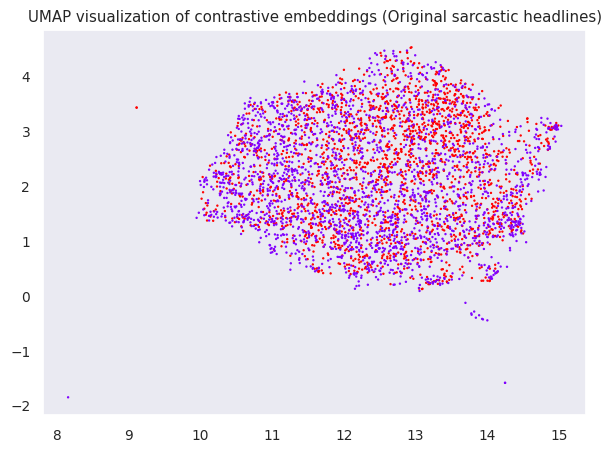

In [ ]:
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of contrastive embeddings (Original sarcastic headlines)")

In [ ]:
isarcasm_test_reduced = manifold_train.transform(isarcasm_embeddings)

Text(0.5, 1.0, 'UMAP visualization of contrastive embeddings (iSarcasm)')

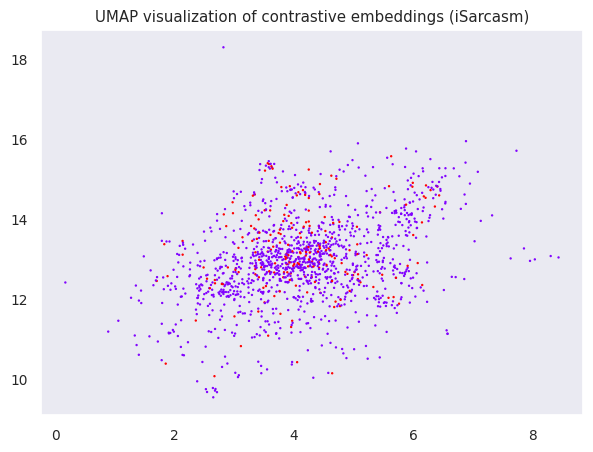

In [ ]:
sns.set(style='dark', font_scale=0.9, palette="hls", rc={'figure.figsize':(7,5)})
plt.scatter(isarcasm_test_reduced[:, 0], isarcasm_test_reduced[:, 1], c=isarcasm_test_labels, s=0.5, cmap='rainbow')
plt.title("UMAP visualization of contrastive embeddings (iSarcasm)")